In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
kyphosis = pd.read_csv("kyphosis.csv")
kyphosis


,Age,Number,Start,Kyphosis
0,71,3,5,absent
1,158,3,14,absent
2,128,4,5,present
3,2,5,1,absent
4,1,4,15,absent
5,1,2,16,absent
6,61,2,17,absent
7,37,3,16,absent
8,113,2,16,absent
9,59,6,12,present


In [6]:
x=kyphosis.drop('Kyphosis',axis=1)
x

,Age,Number,Start
0,71,3,5
1,158,3,14
2,128,4,5
3,2,5,1
4,1,4,15
5,1,2,16
6,61,2,17
7,37,3,16
8,113,2,16
9,59,6,12


In [7]:
y=kyphosis['Kyphosis']
y

0     absent
1     absent
2    present
3     absent
4     absent
5     absent
6     absent
7     absent
8     absent
9    present
Name: Kyphosis, dtype: object

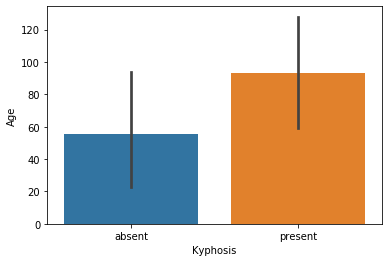

In [8]:
sns.barplot(x='Kyphosis',y='Age',data=kyphosis)

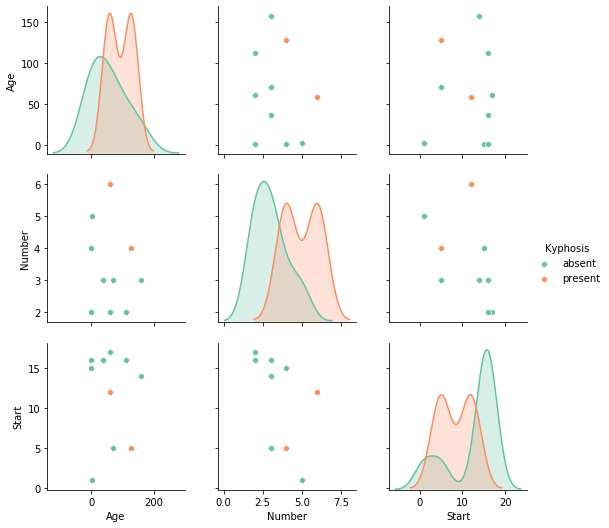

In [18]:
sns.pairplot(kyphosis,hue='Kyphosis',palette='Set2')

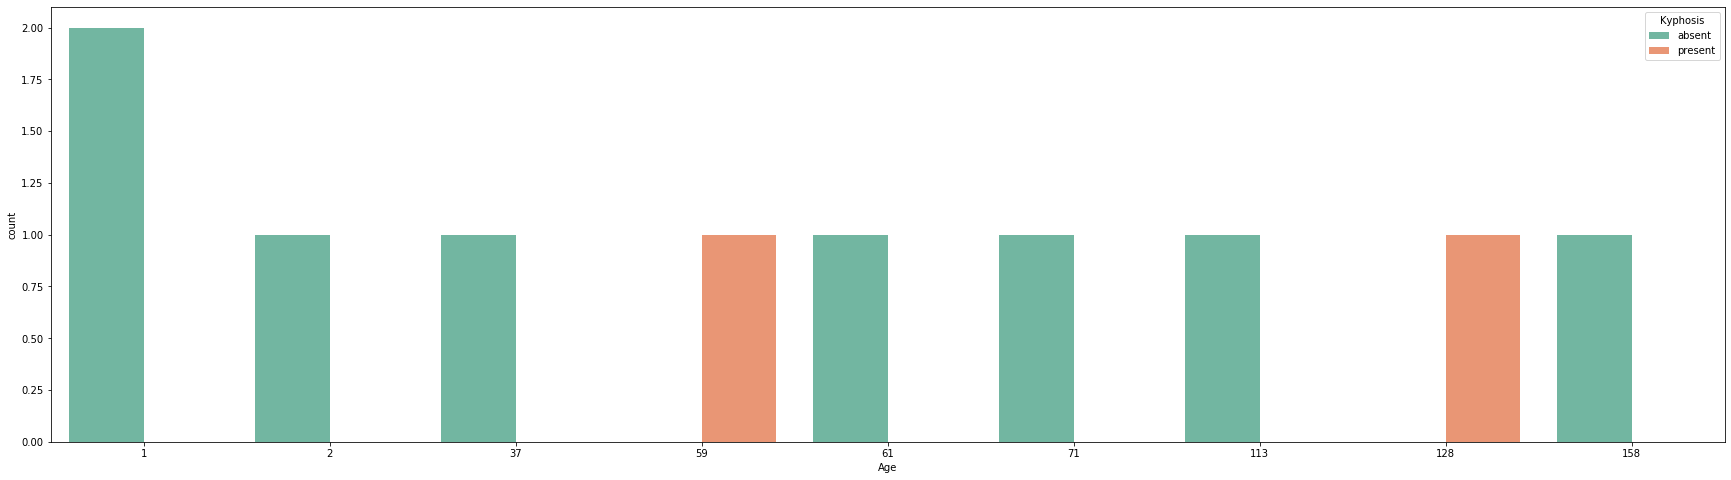

In [17]:
plt.figure(figsize=(30,8))
sns.countplot(x='Age',hue='Kyphosis',data=kyphosis,palette='Set2')

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=100)


In [15]:
x = kyphosis.drop('Kyphosis',axis=1)
y = kyphosis['Kyphosis']

In [64]:
x.head()


,Age,Number,Start
0,71,3,5
1,158,3,14
2,128,4,5
3,2,5,1
4,1,4,15


In [66]:
x=kyphosis.iloc[:[0,1,2]].values

TypeError: cannot do slice indexing on <class 'pandas.core.indexes.range.RangeIndex'> with these indexers [[0, 1, 2]] of <class 'list'>

In [67]:
y.head()

0     absent
1     absent
2    present
3     absent
4     absent
Name: Kyphosis, dtype: object

In [68]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3,random_state=100)
 

In [69]:
from sklearn.tree import DecisionTreeClassifier

In [70]:
dtree=DecisionTreeClassifier()

In [71]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [72]:
predictions= dtree.predict(x_test)
predictions

array(['absent', 'absent', 'present'], dtype=object)

In [73]:
x_test

,Age,Number,Start
7,37,3,16
6,61,2,17
1,158,3,14


In [75]:
from sklearn.metrics import classification_report,confusion_matrix


In [76]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      absent       1.00      0.67      0.80         3
     present       0.00      0.00      0.00         0

    accuracy                           0.67         3
   macro avg       0.50      0.33      0.40         3
weighted avg       1.00      0.67      0.80         3



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [77]:
print(confusion_matrix(y_test,predictions))

[[2 1]
 [0 0]]
